In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./data/train.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1159736 non-null float64
Y_LOC                                1159736 non-null float64
Z_LOC                                1159736 non-null float64
GROUP                                1169233 non-null object
FORMATION                            1033517 non-null object
CALI                                 1082634 non-null float64
RSHA                                 630650 non-null float64
RMED                                 1131518 non-null float64
RDEP                                 1159496 non-null float64
RHOB                                 1009242 non-null float64
GR                                   1170511 non-null float64
SGR                                  69353 non-null float64
NPHI                     

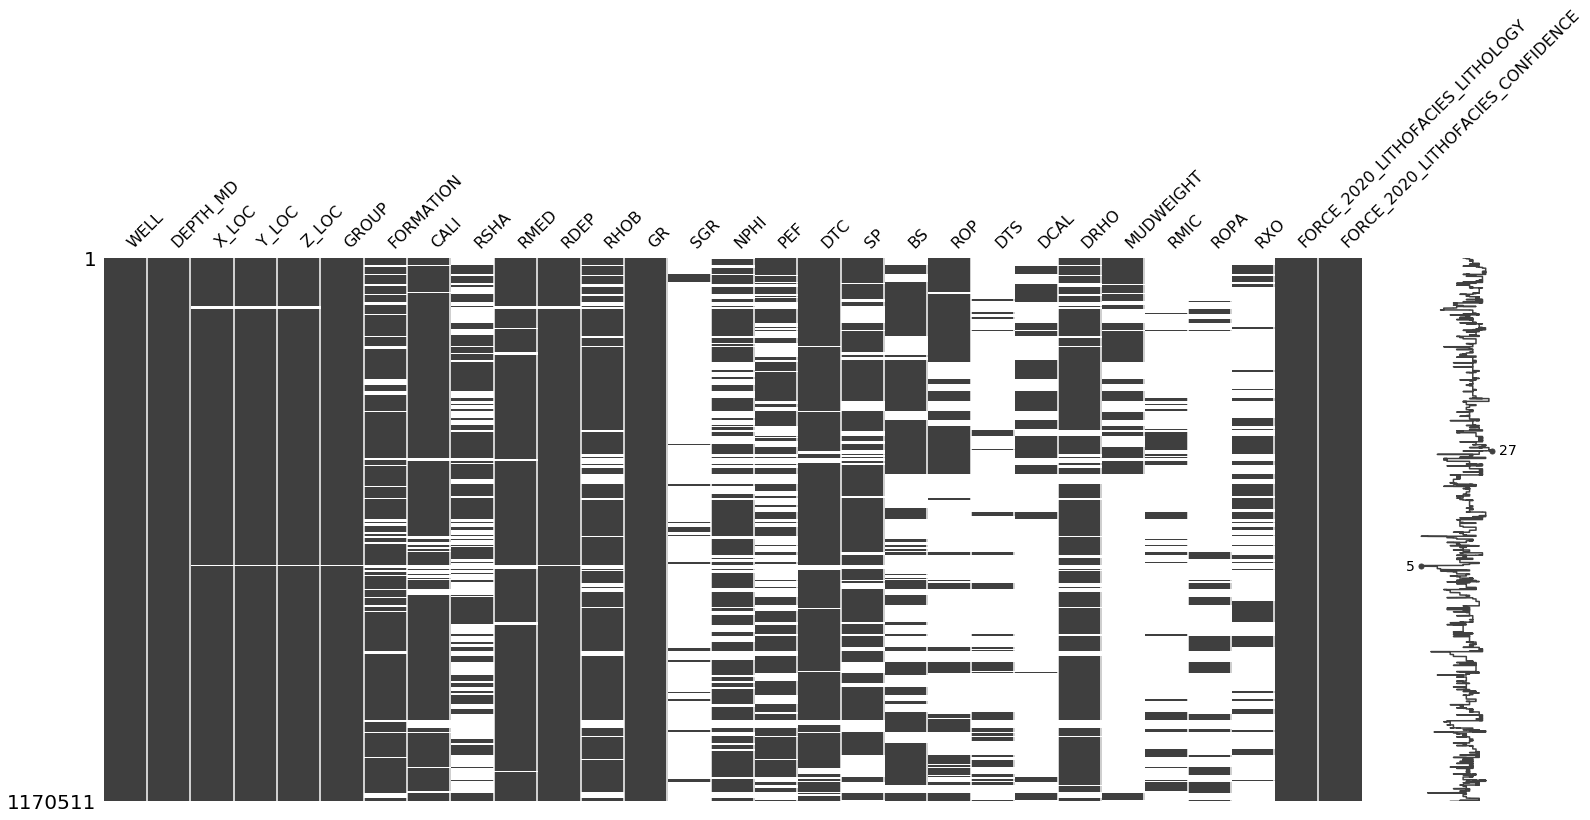

In [5]:
missingno.matrix(data)

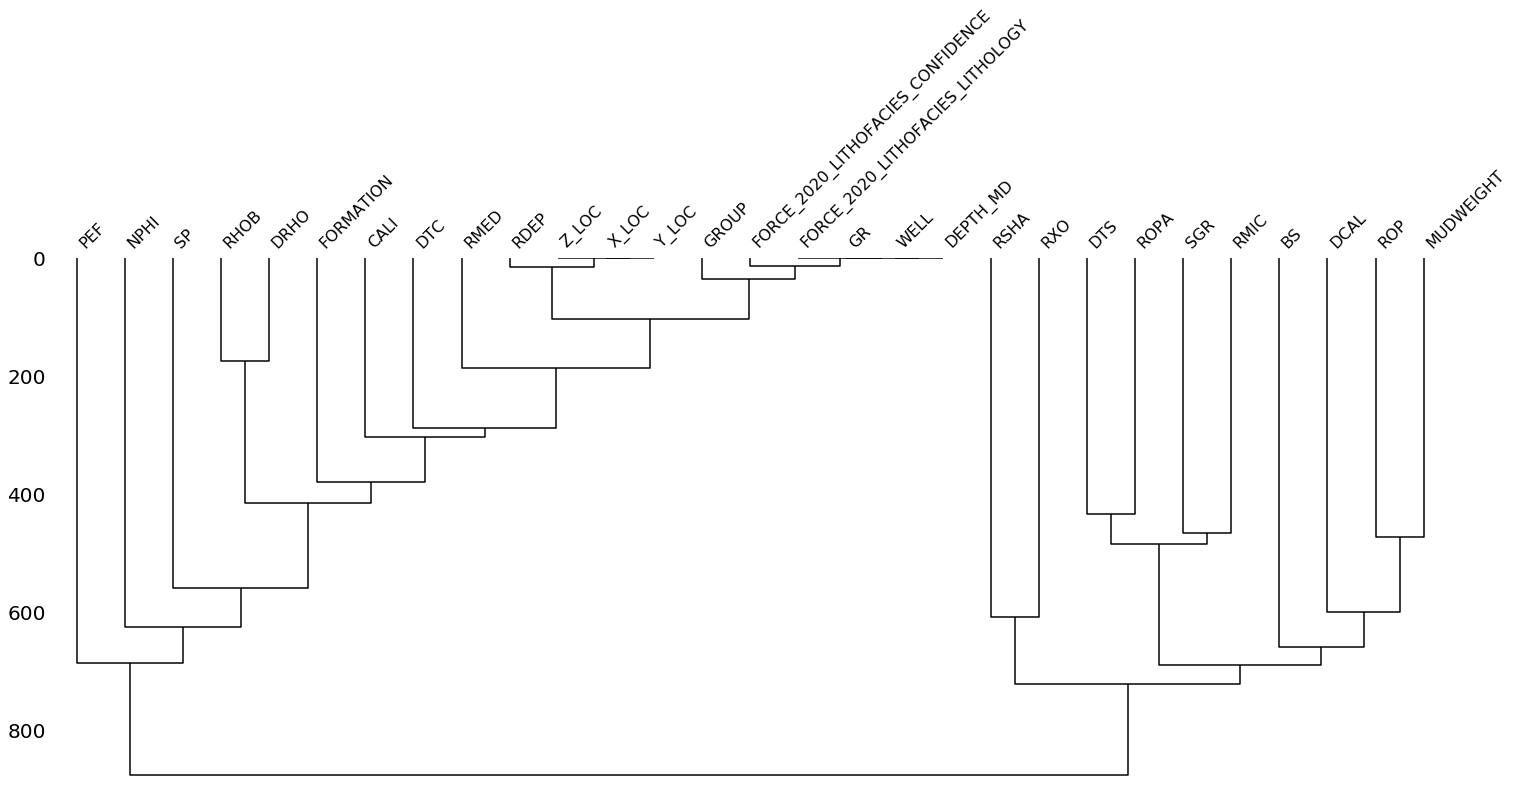

In [6]:
missingno.dendrogram(data)

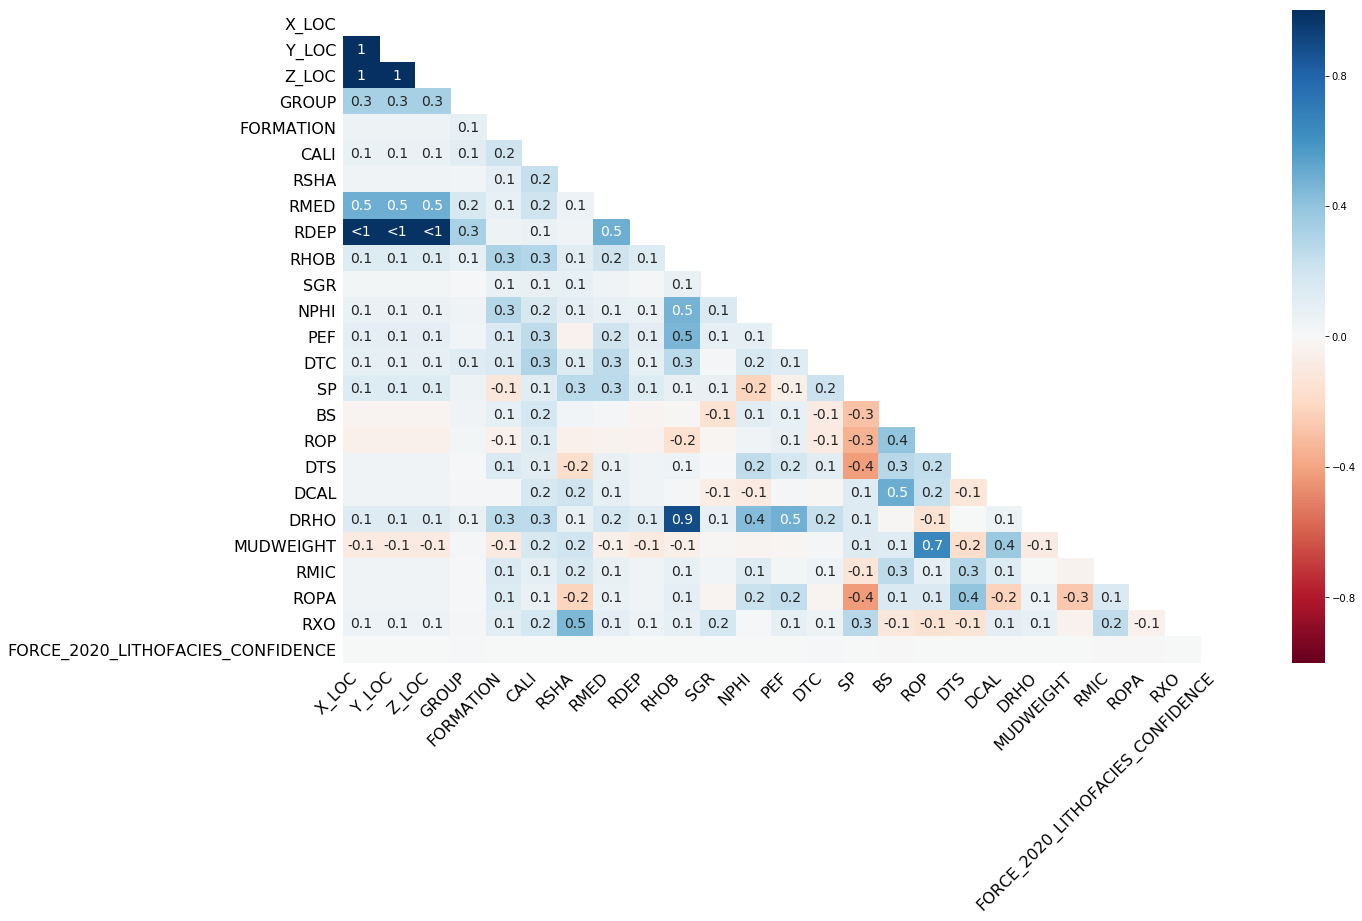

In [7]:
missingno.heatmap(data)

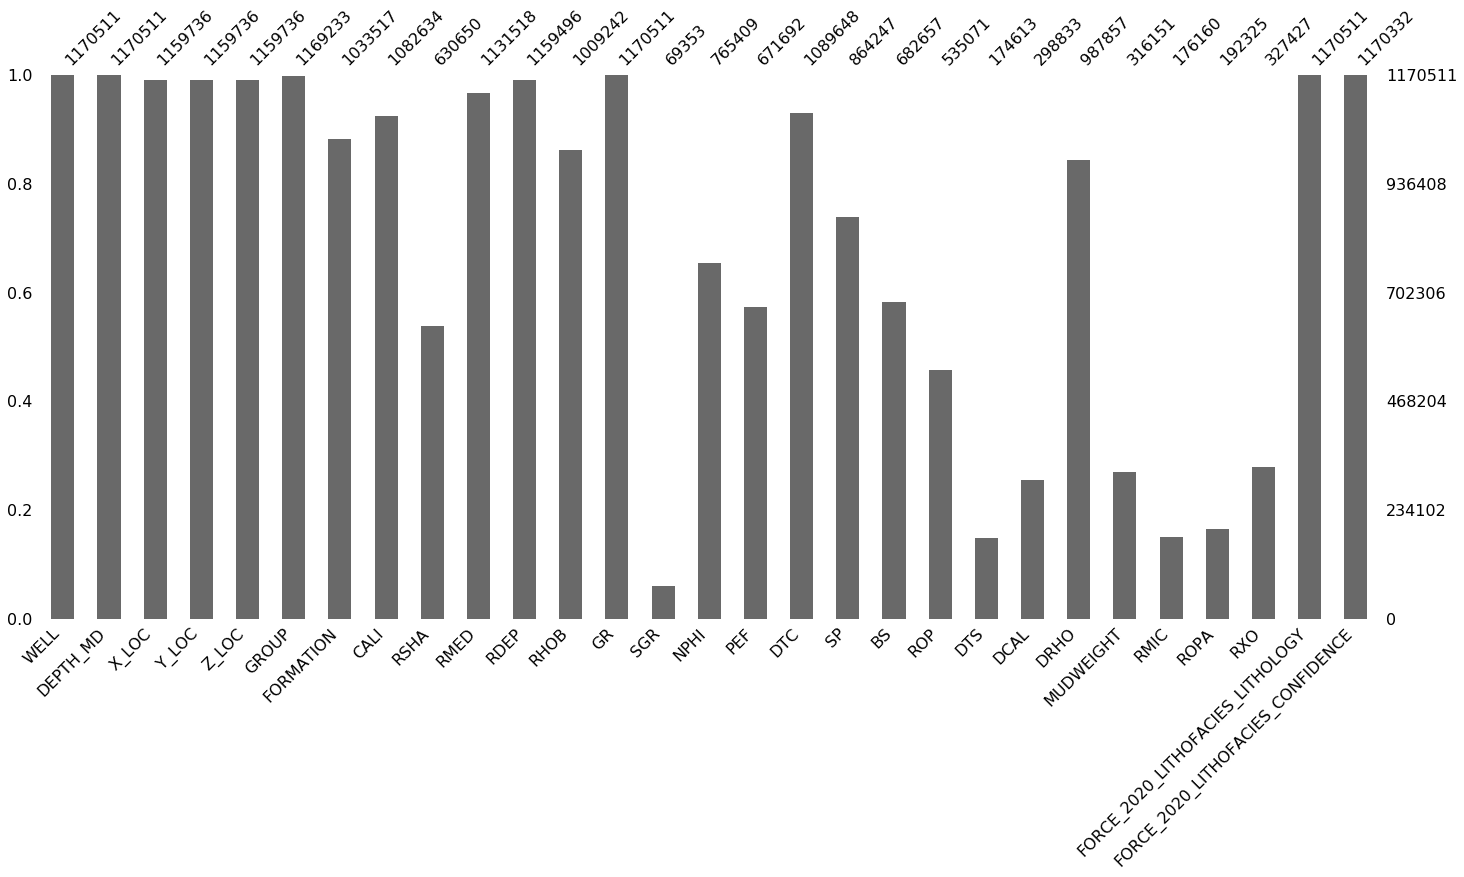

In [8]:
missingno.bar(data)

In [58]:
X= data[['DEPTH_MD', 'GR', 'RHOB']]
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [59]:
X = X.fillna(0)

In [60]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [61]:
y = y.map(lithology_numbers)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
A = np.load('penalty_matrix.npy')

In [64]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

In [65]:
score(y_test.values, y_test.values)

0.0

In [66]:
y_test.shape[0]

234103

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

In [69]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [70]:
y_pred_test = model.predict(X_test)

In [71]:
score(y_test.values, y_pred_test)

-0.5187518955331627